<a href="https://colab.research.google.com/github/Samuel-Mason-git/Recent-Projects/blob/main/Binary_Gender_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gender Binary Classification Neural Network

In [ ]:
!kaggle datasets download -d hb20007/gender-classification
import zipfile
import tensorflow as tf
import pandas as pd
import numpy as np

# Open the zip file
with zipfile.ZipFile('/content/gender-classification.zip', 'r') as zip_ref:
    # Extract all files to the specified directory
    zip_ref.extractall()

Dataset URL: https://www.kaggle.com/datasets/hb20007/gender-classification
License(s): CC-BY-SA-4.0
gender-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
df = pd.read_csv('/content/Transformed Data Set - Sheet1.csv')
df

for column in df.columns:
  print(df[column].unique())

['Cool' 'Neutral' 'Warm']
['Rock' 'Hip hop' 'Folk/Traditional' 'Jazz/Blues' 'Pop' 'Electronic'
 'R&B and soul']
['Vodka' 'Wine' 'Whiskey' "Doesn't drink" 'Beer' 'Other']
['7UP/Sprite' 'Coca Cola/Pepsi' 'Fanta' 'Other']
['F' 'M']


## Split our data into training and test sets
1. Use gender as the predictor variable
2. Use X features as the features
3. Split the data into test and training data

In [ ]:
df['Gender'] = df['Gender'].replace({'M': 1, 'F': 0})
gender_counts = df['Gender'].value_counts()
print(gender_counts)

y = df['Gender']
X = df.drop('Gender', axis=1)
X = pd.get_dummies(X, dtype='int32')

print(len(X), len(y))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f'X train shape: {X_train.shape}')
print(f'X test shape: {X_test.shape}')
print(f'y train shape: {y_train.shape}')
print(f'y test shape: {y_test.shape}')

Gender
0    33
1    33
Name: count, dtype: int64
66 66
X train shape: (52, 20)
X test shape: (14, 20)
y train shape: (52,)
y test shape: (14,)


In [ ]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
print(X_train[0].shape, X_test[0].shape)

(20,) (20,)


## Create a Neural Network
1. Ensure the input shape matches the feature dimensions
2. Apply relu activation for hidden layers
3. Apply sigmoid activation function for the output layer

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(20,)),
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
history = model_1.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)

<Axes: >

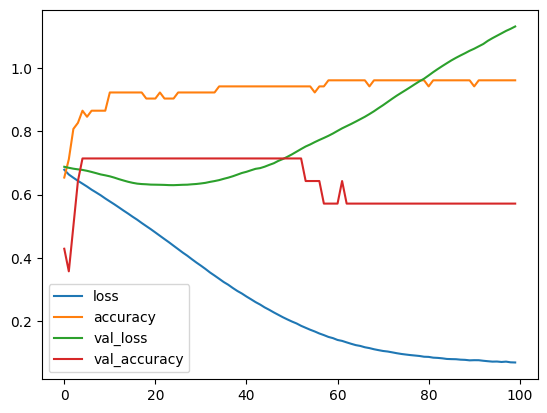

In [ ]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot()

## Create a new model to maximise the validation accuracy
1. Adjust epoch and learning rate in order to increase validation accuracy
2. Add in more hidden layers with 200 neurons

<Axes: >

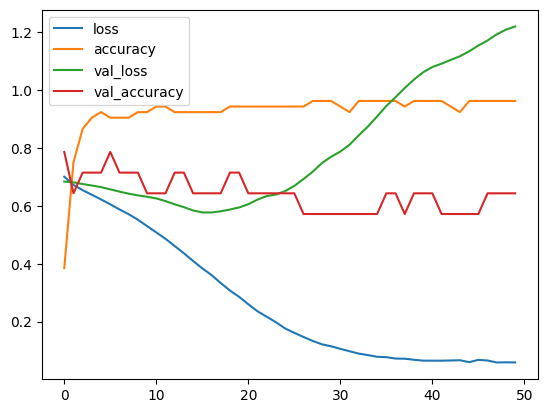

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(20,)),
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=['accuracy'])

# 3. Fit the model
history = model_1.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)

pd.DataFrame(history.history).plot()

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_1.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_1.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))


1/1 [==============================] - 0s 25ms/step - loss: 1.2186 - accuracy: 0.6429
Model loss on test set: 1.2186390161514282
Model accuracy on test set: 64.29%
1/1 [==============================] - 0s 68ms/step


array([[5, 2],
       [3, 4]])

## Create a confusion matrix to see true values against predicted

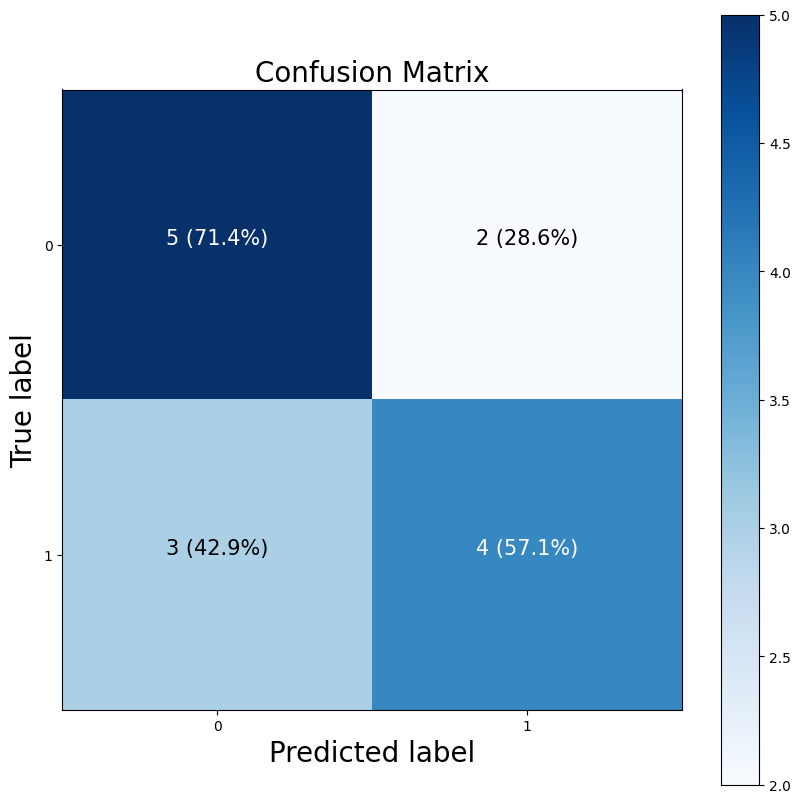

In [ ]:
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)